1.Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

NCR 709
Bangalore 637
Mumbai 449


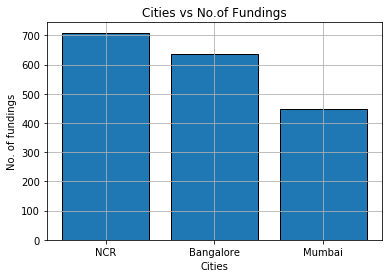

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
d = pd.read_csv('C:/Users/sowndariya/Desktop/CNN/startup_funding.csv')
#location with most number of fundings
# removing row's having nan's in CityLocation
d.CityLocation.dropna(inplace=True)
#getting Bangalore, Mumbai, and NCR cities
#there are many bangalore there, inorder to get that and to get the delhi, noida, gurgaon together as NCR.Using the following fuction
def checkcity(city):
    cities=city.split('/')
    for i in cities:        
        if (i.strip() == 'Bangalore') or (i.strip() == 'bangalore'):
            return 'Bangalore'
        elif (i.strip() == 'Mumbai'):
            return 'Mumbai'
        elif (i.strip() == 'Delhi') or (i.strip() == 'Gurgaon') or (i.strip() == 'Noida') or (i.strip() == 'New Delhi'):
            return 'NCR'
    else:
        return city    
d.CityLocation=d.CityLocation.apply(checkcity)
#getting three cities and their count alone
d.CityLocation=d.CityLocation[(d.CityLocation=='Bangalore')|(d.CityLocation=='Mumbai')|(d.CityLocation=='NCR')]
citycounts=d.CityLocation.value_counts()[:3]
city_names=citycounts.index
no_of_fundings=citycounts.values
for i in range(len(city_names)):
    print(city_names[i],no_of_fundings[i])
#plotting graph
plt.bar(city_names,no_of_fundings,edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('No. of fundings')
plt.title('Cities vs No.of Fundings')
plt.grid()
plt.show()
# I suggest my friend to choose NCR,where the number of funding is highest and it gets 709 times.

In [ ]:
2.Even after trying for so many times, your friend’s startup could not find the investment.
So you decided to take this matter in your hand and try to find the list of investors who probably can invest in
your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment
by contacting these investors. Find the top 5 investors who have invested maximum number of times 
(consider repeat investments in one company also). In a startup, multiple investors might have invested.
So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


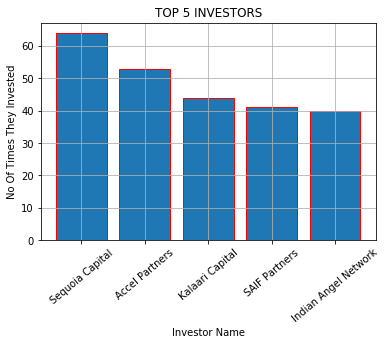

'\nI suggest my friend to contact the following investors those are inversted maximum number of times:\n\n1.Sequoia Capital, invested 64 times\n2.Accel Partners, invested 53 times\n3.Kalaari Capital, invested 44 times\n4.SAIF Partners, invested 41 times\n5.Indian Angel Network, invested  40 times\n\n'

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
data = pd.read_csv('C:/Users/sowndariya/Desktop/CNN/startup_funding.csv')
df = data.copy()
#create a dictionary..go through investors name by applying split and strip functions, investor name(key) and no.of times they invested is got  
d= {}
def sep(iname): 
    l = [i.strip() for i in str(iname).split(',')]
    for j in l: 
        d[j] = d.get(j,0)+1 
    return 

df['InvestorsName'].apply(sep)  
#sorting the keys according to there values in descending order
sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
#to print the top 5 investor name and no of times they invested
j=1
investorname=[]
nooftimes=[]
for i in sorted_d:
        a=i[0]
        investorname.append(a)
        b=i[1]
        nooftimes.append(b)
        print(i[0],i[1])
        if j==5:
            break
        j+=1
#plotting graphs
plt.bar(investorname,nooftimes,edgecolor='red')
plt.title('TOP 5 INVESTORS')
plt.xlabel('Investor Name')
plt.ylabel('No Of Times They Invested')
plt.xticks(rotation=40)
plt.grid()
plt.show()
'''
I suggest my friend to contact the following investors those are inversted maximum number of times:

1.Sequoia Capital, invested 64 times
2.Accel Partners, invested 53 times
3.Kalaari Capital, invested 44 times
4.SAIF Partners, invested 41 times
5.Indian Angel Network, invested  40 times

'''


In [ ]:
3.After re-analysing the dataset you found out that some investors have invested in the same startup at 
different number of funding rounds. So before finalising the previous list, you want to improvise it by
finding the top 5 investors who have invested in different number of startups. This list will be more helpful
than your previous list in finding the investment for your friend startup. Find the top 5 investors who have 
invested maximum number of times in different companies. That means, if one investor has invested multiple times
in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just 
handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


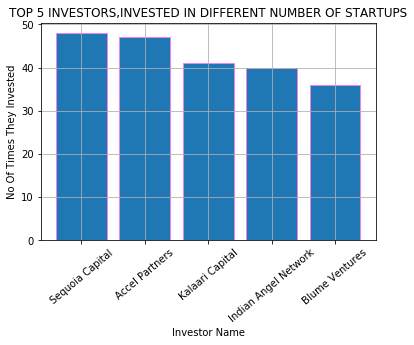

'\nI have suggested the top 5 investors who have invested in different number of startups. This list will be more helpful\nthan my previous list in finding the investment for my friend startup.The top 5 investors who have \ninvested maximum number of times in different companies are:\n1.Sequoia Capital, invested 48 times\n2.Accel Partners, invested 47 times\n3.Kalaari Capital, invested 41 times\n4.Indian Angel Network, invested 40 times\n5.Blume Ventures, invested 36 times\n'

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv('C:/Users/sowndariya/Desktop/CNN/startup_funding.csv')
df = startup.copy()

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  #removing row's having nan's in Investors name and startupnames columns..

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  #replacing the wrong word with the correct one..
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and traversed through each name separately...
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}  #created a dictionary where key is investor's name and value is count of startup's in which they had invested..
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
#sorting the keys according to there values in descending order..and taking the top 5 investor's among all.. 
investors=[]
counts=[]
for key, value in sorted(d1.items(), key=lambda item: item[1],reverse=True)[0:5]:
    a=key
    investors.append(a)
    b=value
    counts.append(b)
    print(key,value) 
#plotting graph
plt.bar(investors,counts,edgecolor='violet')
plt.title('TOP 5 INVESTORS,INVESTED IN DIFFERENT NUMBER OF STARTUPS')
plt.xlabel('Investor Name')
plt.ylabel('No Of Times They Invested')
city
plt.xticks(rotation=40)
plt.grid()
plt.show()

'''
I have suggested the top 5 investors who have invested in different number of startups. This list will be more helpful
than my previous list in finding the investment for my friend startup.The top 5 investors who have 
invested maximum number of times in different companies are:
1.Sequoia Capital, invested 48 times
2.Accel Partners, invested 47 times
3.Kalaari Capital, invested 41 times
4.Indian Angel Network, invested 40 times
5.Blume Ventures, invested 36 times
'''


4.Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


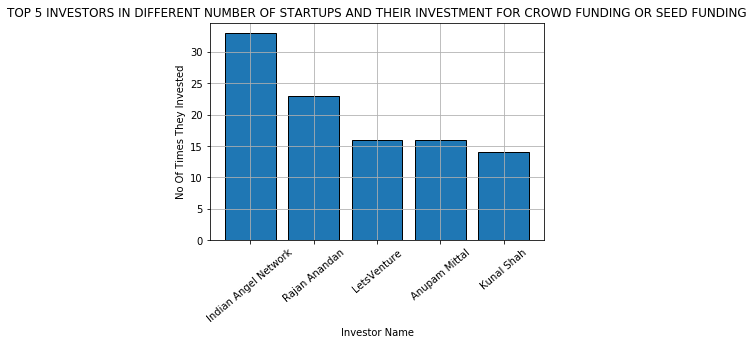

'\nI suggest my friend that the best-suited investment type would be - Seed Funding and Crowdfunding.\nThe top 5 investors who haveinvested in a different number of startups and their investment type is Crowdfunding or\nSeed Funding are,\n\n1.Indian Angel Network, invested 33 times.\n2.Rajan Anandan, invested 23 times.\n3.LetsVenture, invested 16 times.\n4.Anupam Mittal, invested  16 times.\n5.Kunal Shah, invested 14 times.\n'

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv('C:/Users/sowndariya/Desktop/CNN/startup_funding.csv')
df = startup.copy()
#removing row's having nan's in Investors name and startupnames columns..
df.dropna(subset = ["StartupName","InvestorsName","InvestmentType"],inplace = True)

#ignoring the Undisclosed investors
df= df[df.InvestorsName != 'Undisclosed investors']
df= df[df.InvestorsName != 'Undisclosed Investors']

#replacing the wrong word with the correct one..
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)

#getting Seed Funding and Crowd Funding
df = df.loc[(df['InvestmentType'] == 'Seed Funding') | (df['InvestmentType'] == 'Crowd Funding')]

#to get seed funding and crowd funding investment type
#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and traversed through each name separately...
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
#created a dictionary where key is investor's name and value is count of startup's in which they had invested..            
d1 = {}  
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
#sorting the keys according to there values in descending order..and taking the top 5 investor's among all.. 
investors=[]
counts=[]
for key, value in sorted(d1.items(), key=lambda item: item[1],reverse=True)[0:5]:
    a=key
    investors.append(a)
    b=value
    counts.append(b)
    print(key,value)
#plotting graph
plt.bar(investors,counts,edgecolor='black')
plt.title('TOP 5 INVESTORS IN DIFFERENT NUMBER OF STARTUPS AND THEIR INVESTMENT FOR CROWD FUNDING OR SEED FUNDING')
plt.xlabel('Investor Name')
plt.ylabel('No Of Times They Invested')
city
plt.xticks(rotation=40)
plt.grid()
plt.show()

'''
I suggest my friend that the best-suited investment type would be - Seed Funding and Crowdfunding.
The top 5 investors who haveinvested in a different number of startups and their investment type is Crowdfunding or
Seed Funding are,

1.Indian Angel Network, invested 33 times.
2.Rajan Anandan, invested 23 times.
3.LetsVenture, invested 16 times.
4.Anupam Mittal, invested  16 times.
5.Kunal Shah, invested 14 times.
'''


5.Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


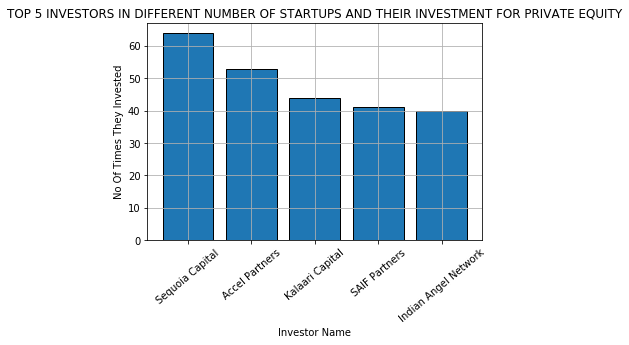

'\nThe best-suited investment type is Private Equity, for that i suggest my friend the following investors who have invested in \nPrivate Equity:\n\n1.Sequoia Capital, invested 45 times\n2.Accel Partners, invested 43 times\n3.Kalaari Capital,invested 35 times\n4.Blume Ventures, invested 27 times\n5.SAIF Partners, invested 24 times\n'

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv('C:/Users/sowndariya/Desktop/CNN/startup_funding.csv')
df = startup.copy()
#removing row's having nan's in Investors name and startupnames columns..
df.dropna(subset = ["StartupName","InvestorsName","InvestmentType"],inplace = True)

#ignoring the Undisclosed investors
df= df[df.InvestorsName != 'Undisclosed investors']
df= df[df.InvestorsName != 'Undisclosed Investors']

#replacing the wrong word with the correct one..
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)

#getting Private Equity Funding
df = df.loc[(df['InvestmentType'] == 'Private Equity')]

#to get seed funding and crowd funding investment type
#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and traversed through each name separately...
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
#created a dictionary where key is investor's name and value is count of startup's in which they had invested..            
d1 = {}  
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
#sorting the keys according to there values in descending order..and taking the top 5 investor's among all.. 
investors=[]
counts=[]
for key, value in sorted(d1.items(), key=lambda item: item[1],reverse=True)[0:5]:
    a=key
    investors.append(a)
    b=value
    counts.append(b)
    print(key,value)
#plotting graph
plt.bar(investorname,nooftimes,edgecolor='black')
plt.title('TOP 5 INVESTORS IN DIFFERENT NUMBER OF STARTUPS AND THEIR INVESTMENT FOR PRIVATE EQUITY')
plt.xlabel('Investor Name')
plt.ylabel('No Of Times They Invested')
city
plt.xticks(rotation=40)
plt.grid()
plt.show()

'''
The best-suited investment type is Private Equity, for that i suggest my friend the following investors who have invested in 
Private Equity:

1.Sequoia Capital, invested 45 times
2.Accel Partners, invested 43 times
3.Kalaari Capital,invested 35 times
4.Blume Ventures, invested 27 times
5.SAIF Partners, invested 24 times
'''
